<a href="https://colab.research.google.com/github/Czedros/CSE352-Machine-Learning-Assignments/blob/main/Games/assignment_mean_connect4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Search: Playing "Mean" Connect 4


## Instructions

Name: Kay Zhang

I understand that my submission needs to be my own work: [enter 'yes']

Points: 10


---



Complete this notebook and submit it (save/print as pdf). The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play "Mean" Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

> **The mean part:** This game has an additional rule. Every time it is a player's turn, the player can decide to instead of playing a new disk, take a bottom row disk of the opponent and place it back in the top of the same column. All disks above the removed disk will fall down one position and the removed one will be placed on top. Note that a player can only move an _opponent's disc_ that is in the _bottom row_ of the board. **Further, you are not allowed to play a mean move if your opponent just played one.** This ensures the game will end at some point. This also may affect the definition of a state, compared with standard Connect 4.

If a mean move causes both players to win, the game immediately ends and it is a tie, even if one player has more connect-4s than the other one. If a mean move causes one player to win, then the game also ends and the player with the connect-4 is the winner.

Note that normal [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

# Task 1 Solution
##Initial State
The board is 7 columns by 6 rows, all cells are initially empty.

Player 1 moves first.

A flag last_move_was_mean set to False (since no move has been made).

##Actions

Regular Move: Drop a disc in any of the 7 columns that is not already full.
   - The disc occupies the lowest empty cell in that column.

Mean Move: If the opponent has a disc in the bottom cell of any column and the previous move was not mean, the current player can:
   - Take the opponent's disc from the bottom cell of that column.
   - "Lift" it to the topmost empty cell of the same column.
   - The discs that were in between fall down by one cell.
   - Mark the "mean move" flag as True, which disallows the next player from making a mean move immediately afterward.

## 1.3 Transition Model
- For a **Regular Move**:
  - The new state is obtained by adding the current player's disc to the lowest empty row in the chosen column.
  - The "mean move" flag is set to False

- For a **Mean Move**:
  - Remove the opponent's disc from the bottom cell of the chosen column.
  - Shift all discs above it one row down.
  - Place the removed disc in the highest empty cell of that column
  - Set the "mean move" flag to True.

## 1.4 Test for Terminal State
Terminal State Test:

A player has four connected disks (horizontally, vertically, or diagonally).

The board is full (no legal moves left).

A mean move causes both players to win (tie).

## 1.5 Utility for Terminal States
- +1 for the maximizing (current) player if they have a winning connect-4.
- -1 for the minimizing (opponent) player if the current player loses.
-  0 if it is a tie.

#How big is the state space? Give an estimate and explain it.

A very rough upper bound for standard Connect-4 is often estimated as follows:
- Each cell can be in 3 possible states: empty, Player 1 disc, Player 2 disc.
- With 42 cells, that yields 3^42 possible board configurations.

**However**, in Mean Connect 4, we also track:
1. Which player's turn it is (factor of 2).
2. Whether the last move was mean or not (another factor of 2).

So an upper bound could be on the order of:
2 x 2 x 3^42.

Which is approximately 1.41 x 10^21.


#How big is the game tree that minimax search will go through? Give an estimate and explain it.

There's a branching factor of 14, given that there are 7 possible regular and 7 possible "mean" moves.

## Task 2: Game Environment and Random Agent [3 point]

You can use a numpy character array as the board. Note that the following function can create boards of different sizes.

In [1]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


Instead of colors (red and yellow), you can use 1 and -1 to represent the players Max and Min. Make sure that your agent functions all have the from: `agent_type(state, player = 1)`, where board is the current board position and player is the player (1, -1) whose next move it is and who the agent should play.

Visualization code by Randolph Rankin:

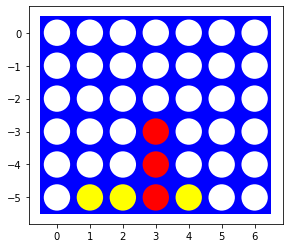

In [ ]:
import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

visualize(board)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [12]:
import numpy as np

def _column_is_full(board, col):
    """Check if a given column col is full (i.e. top cell is nonzero)."""
    return board[0, col] != 0

def _lowest_empty_row(board, col):
    """
    Return the index of the lowest empty row in column 'col',
    or None if the column is full.
    """
    rows = board.shape[0]
    for row in range(rows-1, -1, -1):
        if board[row, col] == 0:
            return row
    return None  # if no empty cell

def actions(board, player, last_move_was_mean=False):
    """
    Return all possible actions for 'player' in the current board state.
    Each action is a tuple: ("regular", col) or ("mean", col).
    """
    rows, cols = board.shape
    opponent = -player
    valid_actions = []

    # --- 1) Regular moves ---
    for col in range(cols):
        if not _column_is_full(board, col):
            valid_actions.append(("regular", col))

    # --- 2) Mean moves ---
    if not last_move_was_mean:
        bottom_row = rows - 1
        for col in range(cols):
            if board[bottom_row, col] == opponent:
                if board[0, col] == 0:  # top is empty => we can move that bottom disc up top
                    valid_actions.append(("mean", col))

    return valid_actions

def result(board, action, player, last_move_was_mean=False):
    """
    Apply the given action ("regular" or "mean") in a *copy* of 'board' for 'player'.
    Returns (new_board, next_player, new_last_mean_flag).
    """
    rows, cols = board.shape
    new_board = board.copy()
    action_type, col = action
    opponent = -player

    if action_type == "regular":
        # Place player's disc in the lowest empty position of col.
        row_to_fill = _lowest_empty_row(new_board, col)
        if row_to_fill is None:
            raise ValueError(f"Column {col} is full; cannot do a regular move here.")
        new_board[row_to_fill, col] = player

        return new_board, opponent, False  # Next player is the opponent; last move was NOT mean

    elif action_type == "mean":
        # We remove opponent's disc from bottom cell,
        # shift everything above it down by one,
        # then place that disc in the topmost empty cell in the same col.
        bottom_row = rows - 1

        if new_board[bottom_row, col] != opponent:
            raise ValueError("Invalid mean move: bottom cell is not the opponent's disc.")
        new_board[bottom_row, col] = 0

        for r in range(bottom_row - 1, -1, -1):
            new_board[r+1, col] = new_board[r, col]
        new_board[0, col] = 0

        row_to_fill = _lowest_empty_row(new_board, col)
        if row_to_fill is None:
            raise ValueError("Invalid mean move: no space at the top? Shouldn't happen if action is valid.")
        new_board[row_to_fill, col] = opponent

        return new_board, opponent, True  # Next player is the opponent; last move WAS mean

    else:
        raise ValueError(f"Unknown action type: {action_type}")

def terminal(board):
    """
    Check if the position is terminal (game over).
    Returns True if terminal, else False.
    """
    # 1) Check if either/both players has a connect-4
    p1_win = has_connect4(board, +1)
    p2_win = has_connect4(board, -1)

    if p1_win or p2_win:
        # If both are True (only possible via a mean move), the game ends in a tie
        return True

    # If the top row has no empty cells, the board is effectively full
    if np.all(board[0] != 0):
        return True

    return False

def utility(board):
    """
    Returns a utility value for the board:
      +1 if Player +1 (Max) has connect-4
      -1 if Player -1 (Min) has connect-4
       0 if neither or both (tie).
    """
    p1_win = has_connect4(board, +1)
    p2_win = has_connect4(board, -1)

    if p1_win and not p2_win:
        return +1
    elif p2_win and not p1_win:
        return -1
    else:
        # Either tie or no connect-4
        return 0

def has_connect4(board, player):
    """
    Check if 'player' (+1 or -1) has a 4-in-a-row anywhere on the board.
    This works for boards of arbitrary shape.
    Helper for a helper... Yes.
    """
    rows, cols = board.shape

    for r in range(rows):
        for c in range(cols - 3):
            window = board[r, c:c+4]
            if np.all(window == player):
                return True

    for r in range(rows - 3):
        for c in range(cols):
            window = board[r:r+4, c]
            if np.all(window == player):
                return True

    for r in range(rows - 3):
        for c in range(cols - 3):
            diag = [board[r + i, c + i] for i in range(4)]
            if np.all(np.array(diag) == player):
                return True

    for r in range(rows - 3):
        for c in range(3, cols):
            diag = [board[r + i, c - i] for i in range(4)]
            if np.all(np.array(diag) == player):
                return True

    return False


Implement an agent that plays randomly. Make sure the agent function receives as the percept the game state and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(state, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [26]:
import random

def random_player(board, player, last_move_was_mean=False):
    legal_moves = actions(board, player, last_move_was_mean)
    return random.choice(legal_moves) if legal_moves else None

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [29]:
def play_game(agent1, agent2, verbose=False):
    """
    Let agent1 (player=+1) and agent2 (player=-1) play until terminal.
    Return the utility of the final board: +1, -1, or 0 (tie).
    """
    board = empty_board((6,7))
    current_player = +1   # agent1 goes first
    last_move_was_mean = False

    while True:
        if terminal(board):
            break

        if current_player == +1:
            action = agent1(board, +1, last_move_was_mean)
        else:
            action = agent2(board, -1, last_move_was_mean)

        # If no legal moves, we are effectively stuck => terminal
        if not action:
            break

        new_board, next_player, new_mean_flag = result(board, action, current_player, last_move_was_mean)

        # Update
        board = new_board
        current_player = next_player
        last_move_was_mean = new_mean_flag

        if verbose:
            print(board, "\n")

    return utility(board)

num_games = 1000
wins_player1 = 0
wins_player2 = 0
ties = 0

for _ in range(num_games):
    outcome = play_game(random_player, random_player, verbose=False)
    if outcome == +1:
        wins_player1 += 1
    elif outcome == -1:
        wins_player2 += 1
    else:
        ties += 1

print(f"Over {num_games} random vs. random games:")
print(f"Player 1 wins: {wins_player1}")
print(f"Player 2 wins: {wins_player2}")
print(f"Ties:          {ties}")

Over 1000 random vs. random games:
Player 1 wins: 583
Player 2 wins: 395
Ties:          22


#Result Analysis

P1 wins more than P2, with minimal ties, this is expected as player 1 has a great advantage compared to P2 in Connect 4.

The win loss ratio for p1 vs p2 is about 60:40, which is expected. As with an optimal agent P1 always wins.

Ties are interesting, as usually connect 4 always has a winner. So seeing ties is kind of interesting.

## Task 3: Minimax Search with Alpha-Beta Pruning [3 points]

### Implement the search starting.

Implement the search starting from a given state and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [57]:
import math
def max_value_ab(board, player, last_move_was_mean, alpha, beta):
    if terminal(board):
        return utility(board), None
    v, best_action = -math.inf, None
    for a in actions(board, player, last_move_was_mean):
        new_board, next_player, new_mean = result(board, a, player, last_move_was_mean)
        v2, _ = min_value_ab(new_board, next_player, new_mean, alpha, beta)
        if v2 > v:
            v, best_action = v2, a
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value_ab(board, player, last_move_was_mean, alpha, beta):
    if terminal(board):
        return utility(board), None
    v, best_action = math.inf, None
    for a in actions(board, player, last_move_was_mean):
        new_board, next_player, new_mean = result(board, a, player, last_move_was_mean)
        v2, _ = max_value_ab(new_board, next_player, new_mean, alpha, beta)
        if v2 < v:
            v, best_action = v2, a
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action
def alpha_beta_agent(board, player, last_move_was_mean=False):
    """
    If player=+1 => do max_value_ab
    If player=-1 => do min_value_ab
    Returns just the chosen action.
    """
    alpha, beta = -math.inf, math.inf
    if player == +1:
        _, move = max_value_ab(board, player, last_move_was_mean, alpha, beta)
    else:
        _, move = min_value_ab(board, player, last_move_was_mean, alpha, beta)
    return move


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [46]:
import time
def experiment_alpha_beta(board, player=+1, last_move_was_mean=False):
    """
    1) Print the board
    2) Call alpha_beta_agent
    3) Measure time
    4) Print the chosen action
    """
    print("Current board state:\n", board)
    print("Player to move:", "Player +1" if player == +1 else "Player -1")
    print("last_move_was_mean:", last_move_was_mean)

    start_time = time.perf_counter()
    chosen_action = alpha_beta_agent(board, player, last_move_was_mean)
    end_time = time.perf_counter()

    print(f"Chosen action by alpha-beta: {chosen_action}")
    print(f"Time taken: {end_time - start_time:.6f} seconds")
    print("-"*40)


if __name__ == "__main__":
    # Smaller board first (4x4), for quick results

    # 1) Simple board where +1 has an advantage
    board1 = np.zeros((4,4), dtype=int)
    board1[3,0] = +1
    board1[3,1] = +1
    board1[3,2] = +1
    board1[3,3] = -1

    experiment_alpha_beta(board1, player=+1, last_move_was_mean=False)

    # 2) A board where -1 can do a mean move to disrupt +1
    board2 = np.zeros((4,4), dtype=int)
    board2[3,0] = +1
    board2[3,1] = +1
    board2[2,0] = +1
    board2[3,2] = -1
    board2[2,2] = -1
    # last move was not mean => -1 can consider a mean move if there's a +1 at bottom somewhere
    experiment_alpha_beta(board2, player=-1, last_move_was_mean=False)

    # 3) A mid-game state (4x4) with some random discs
    board3 = np.array([
        [ 0,  0,  0,  0],
        [ 0, +1, -1,  0],
        [ 0, +1, +1, -1],
        [+1, -1, +1, -1]
    ])
    experiment_alpha_beta(board3, player=+1, last_move_was_mean=False)

    # 4) Another state with potential vertical connect-4
    board4 = np.zeros((6,4), dtype=int)
    # place +1 vertically in col=0
    board4[5,0] = +1
    board4[4,0] = +1
    board4[3,0] = +1
    # Place -1 somewhere else
    board4[5,1] = -1
    board4[4,1] = -1
    experiment_alpha_beta(board4, player=+1, last_move_was_mean=False)

    # 5) Larger board, near full. 4x6
    board5 = np.array([
        [+1, +1, -1, +1,  0,  0],
        [+1, -1, +1, +1, -1,  0],
        [+1, +1, +1, -1, +1, -1],
        [+1, -1, -1, +1, +1, -1]
    ])
    # Suppose it's -1's turn
    experiment_alpha_beta(board5, player=-1, last_move_was_mean=False)

    print("Finished testing 5 manually created boards.\n")

Current board state:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  1  1 -1]]
Player to move: Player +1
last_move_was_mean: False
Chosen action by alpha-beta: ('regular', 2)
Time taken: 43.536741 seconds
----------------------------------------
Current board state:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  0 -1  0]
 [ 1  1 -1  0]]
Player to move: Player -1
last_move_was_mean: False
Chosen action by alpha-beta: ('regular', 2)
Time taken: 1.477536 seconds
----------------------------------------
Current board state:
 [[ 0  0  0  0]
 [ 0  1 -1  0]
 [ 0  1  1 -1]
 [ 1 -1  1 -1]]
Player to move: Player +1
last_move_was_mean: False
Chosen action by alpha-beta: ('regular', 0)
Time taken: 0.556321 seconds
----------------------------------------
Current board state:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  0  0  0]
 [ 1 -1  0  0]
 [ 1 -1  0  0]]
Player to move: Player +1
last_move_was_mean: False
Chosen action by alpha-beta: ('regular', 0)
Time taken: 20.710795 seconds
-------------

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

####Answer

It takes on average 20-40 seconds given a clean board, and grows exponentially given the increase in possible moves.

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move.

In [58]:

def ordered_actions(board, player, last_move_was_mean=False):
    """
    Like 'actions', but we reorder columns so that columns near the center
    are explored first. This tends to improve alpha-beta pruning in Connect4.
    """
    acts = actions(board, player, last_move_was_mean)
    rows, cols = board.shape
    center = (cols - 1)/2.0

    def priority(move):
        (mt, c) = move
        # more negative the distance => higher priority
        # we can just do negative absolute distance
        return -abs(c - center)

    acts.sort(key=priority, reverse=True)

    return acts


#Reusing existing function names out of laziness
def max_value_ab(board, player, last_move_was_mean, alpha, beta, move_order=False):
    if terminal(board):
        return utility(board), None
    v, best_action = -math.inf, None

    # Decide which actions function to use
    if move_order:
        possible_moves = ordered_actions(board, player, last_move_was_mean)
    else:
        possible_moves = actions(board, player, last_move_was_mean)

    for a in possible_moves:
        new_board, next_p, next_m = result(board, a, player, last_move_was_mean)
        v2, _ = min_value_ab(new_board, next_p, next_m, alpha, beta, move_order)
        if v2 > v:
            v, best_action = v2, a
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value_ab(board, player, last_move_was_mean, alpha, beta, move_order=False):
    if terminal(board):
        return utility(board), None
    v, best_action = math.inf, None

    if move_order:
        possible_moves = ordered_actions(board, player, last_move_was_mean)
    else:
        possible_moves = actions(board, player, last_move_was_mean)

    for a in possible_moves:
        new_board, next_p, next_m = result(board, a, player, last_move_was_mean)
        v2, _ = max_value_ab(new_board, next_p, next_m, alpha, beta, move_order)
        if v2 < v:
            v, best_action = v2, a
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action

def alpha_beta_agent(board, player, last_move_was_mean=False, move_order=False):
    alpha, beta = -math.inf, math.inf
    if player == +1:
        val, move = max_value_ab(board, player, last_move_was_mean, alpha, beta, move_order)
    else:
        val, move = min_value_ab(board, player, last_move_was_mean, alpha, beta, move_order)
    return move

def play_once(board, player, move_order=False):
    """
    Play one move using alpha-beta, measure how long it takes.
    Return (chosen_move, time_elapsed).
    """
    start_t = time.perf_counter()
    mv = alpha_beta_agent(board, player, move_order=move_order)
    end_t = time.perf_counter()
    elapsed = end_t - start_t
    return mv, elapsed

def make_experiment_table():
    """
    We'll test a few board shapes or states.
    For each, we measure the time to pick a single move
    with (move_order=False) and with (move_order=True).
    We'll store or print the results in a small table.
    """
    # Example board sizes or states to measure
    test_cases = []
    # 1) 4x4 almost empty
    test_cases.append( (np.zeros((4,4), dtype=int), +1) )

    print("Board Size | MoveOrder=False Time (s) | MoveOrder=True Time (s) | Example Move")
    print("-"*70)

    for board, ply in test_cases:
        # with no ordering
        _, t_no_order = play_once(board, ply, move_order=False)
        # with ordering
        chosen_move, t_order = play_once(board, ply, move_order=True)

        shape_str = f"{board.shape[0]}x{board.shape[1]}"
        print(f"{shape_str:<10} | {t_no_order:24.6f} | {t_order:23.6f} | {chosen_move}")
make_experiment_table()



Board Size | MoveOrder=False Time (s) | MoveOrder=True Time (s) | Example Move
----------------------------------------------------------------------
4x4        |                81.189646 |               82.100465 | ('regular', 1)


### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

####**Answer**
To minimize the number of Extraneous moves, we can use a Depth Limit. Which, at the cost of accuracy can help save time in searching.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [60]:
#Redefining Play Game here to make size of board dynamic. Too laze to actually change original
def play_game(agent1, agent2, rows=4, cols=4, verbose=False):
    """
    Let agent1 (Player +1) and agent2 (Player -1) play on a board of size rows x cols.
    Return the final utility: +1 if agent1 wins, -1 if agent2 wins, 0 if tie.
    """
    board = np.zeros((rows, cols), dtype=int)
    current_player = +1
    last_move_mean = False

    while True:
        if terminal(board):
            break
        if current_player == +1:
            action = agent1(board, +1, last_move_mean)
        else:
            action = agent2(board, -1, last_move_mean)

        if not action:
            # no legal moves => terminal
            break

        new_board, next_player, new_mean = result(board, action, current_player, last_move_mean)
        board = new_board
        current_player = next_player
        last_move_mean = new_mean

        if verbose:
            print(f"Player { -current_player } took action {action}")
            print(board, "\n")

    return utility(board)

def experiment_minimax_vs_random(num_games=5, rows=4, cols=4):
    """
    Let the alpha_beta_agent (or your minimax agent) face the random_agent
    for num_games. Print how many wins, losses, ties.
    """
    wins_p1 = 0
    wins_p2 = 0
    ties    = 0

    for _ in range(num_games):
        outcome = play_game(alpha_beta_agent, random_player, rows=rows, cols=cols, verbose=False)
        if outcome == +1:
            wins_p1 += 1
        elif outcome == -1:
            wins_p2 += 1
        else:
            ties += 1

    print(f"After {num_games} games on a {rows}x{cols} board:")
    print(f"  Minimax (Player +1) wins: {wins_p1}")
    print(f"  Random  (Player -1) wins: {wins_p2}")
    print(f"  Ties: {ties}")

experiment_minimax_vs_random()

After 5 games on a 4x4 board:
  Minimax (Player +1) wins: 5
  Random  (Player -1) wins: 0
  Ties: 0


#NOTE
This part is what made me late. I tried to run 5 games, this took 16 minutes per game. But originally took 80... I need to either fix the runtime on this thing or use a local next time.

The end result was that Minimax won all of the games.

This is pretty expected as Minimax is a proper algorithm that can take advantage of its opponent's misplays.

## Task 4: Heuristic Alpha-Beta Tree Search [3 points]

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

A Heuristic Evaluation Function would implement the usage of Heuristics, or some calculated score value that the Agent would use to "maximize" its outputs.

As in

 Example scoring :

    +100 for 4 in a row

    +50 for 3 in a row + 1 empty

    +10 for 2 in a row + 2 empty

    +1 for 1 in a row + 3 empty

    0 otherwise

### Cutting off search

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [64]:
def evaluate_window(window, player):
    """
    Given a 1D array/list of length 4 (the "window"),
    return a score indicating how good this window is for 'player'.

    """
    # Count occurrences
    count_self = np.count_nonzero(window == player)
    count_opp  = np.count_nonzero(window == -player)
    count_empty = np.count_nonzero(window == 0)

    # If window contains both player's discs => worthless to either
    if count_self > 0 and count_opp > 0:
        return 0

    # Score lines that are exclusively ours or exclusively empty
    if count_self == 4:
        return 10000
    elif count_self == 3 and count_empty == 1:
        return 50
    elif count_self == 2 and count_empty == 2:
        return 10
    elif count_self == 1 and count_empty == 3:
        return 1

    return 0

def heuristic_evaluation(board):
    """
    Returns a heuristic value indicating how good the board is for each player

    """
    rows, cols = board.shape
    score_p1 = 0
    score_p2 = 0

    # --- Horizontal ---
    for r in range(rows):
        for c in range(cols - 3):
            window = board[r, c:c+4]
            score_p1 += evaluate_window(window, +1)
            score_p2 += evaluate_window(window, -1)

    # --- Vertical ---
    for r in range(rows - 3):
        for c in range(cols):
            window = board[r:r+4, c]
            score_p1 += evaluate_window(window, +1)
            score_p2 += evaluate_window(window, -1)

    # --- Diagonal (down-right) ---
    for r in range(rows - 3):
        for c in range(cols - 3):
            window = [board[r+i, c+i] for i in range(4)]
            score_p1 += evaluate_window(window, +1)
            score_p2 += evaluate_window(window, -1)

    # --- Diagonal (down-left) ---
    for r in range(rows - 3):
        for c in range(3, cols):
            window = [board[r+i, c-i] for i in range(4)]
            score_p1 += evaluate_window(window, +1)
            score_p2 += evaluate_window(window, -1)

    return score_p1 - score_p2

def alpha_beta_search(board, player, last_move_was_mean, alpha, beta, depth, max_depth):
    # 1) Terminal test
    if terminal(board):
        # Return actual utility if it's truly terminal
        return utility(board), None
    # 2) Depth cutoff
    if depth >= max_depth:
        # Return heuristic eval instead of True utility
        return heuristic_evaluation(board), None

    # 3) Normal alpha-beta logic...
    if player == +1:
        return max_value_ab(board, player, last_move_was_mean, alpha, beta, depth, max_depth)
    else:
        return min_value_ab(board, player, last_move_was_mean, alpha, beta, depth, max_depth)

def max_value_ab(board, player, last_move_was_mean, alpha, beta, depth, max_depth):
    v = -float('inf')
    best_move = None
    possible_moves = actions(board, player, last_move_was_mean)
    if not possible_moves:
        return heuristic_evaluation(board), None
    for a in possible_moves:
        new_board, next_player, new_mean = result(board, a, player, last_move_was_mean)
        v2, _ = alpha_beta_search(new_board, next_player, new_mean, alpha, beta, depth+1, max_depth)
        if v2 > v:
            v = v2
            best_move = a
        alpha = max(alpha, v)
        if alpha >= beta:
            break
    return v, best_move

def min_value_ab(board, player, last_move_was_mean, alpha, beta, depth, max_depth):
    v = float('inf')
    best_move = None
    possible_moves = actions(board, player, last_move_was_mean)
    if not possible_moves:
        return heuristic_evaluation(board), None
    for a in possible_moves:
        new_board, next_player, new_mean = result(board, a, player, last_move_was_mean)
        v2, _ = alpha_beta_search(new_board, next_player, new_mean, alpha, beta, depth+1, max_depth)
        if v2 < v:
            v = v2
            best_move = a
        beta = min(beta, v)
        if beta <= alpha:
            break
    return v, best_move

def heuristic_alpha_beta_agent(board, player, last_move_was_mean=False, max_depth=4):
    alpha, beta = -float('inf'), float('inf')
    best_val, best_move = alpha_beta_search(board, player, last_move_was_mean, alpha, beta, depth=0, max_depth=max_depth)
    return best_move

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

In [54]:
def test_heuristic_on_board(board, player, last_move_mean=False, max_depth=4):
    """
    1) Print the board
    2) Run the heuristic alpha-beta agent
    3) Print the chosen action and time
    """
    print("Board:\n", board)
    print(f"Player to move: {player}, last_move_mean={last_move_mean}")

    start_t = time.perf_counter()
    move = heuristic_alpha_beta_agent(board, player, last_move_mean, max_depth)
    end_t = time.perf_counter()

    print(f"Heuristic Alpha-Beta chooses: {move}")
    print(f"Time taken: {end_t - start_t:.6f} seconds\n{'-'*50}")


board1 = np.zeros((4,4), dtype=int)
board1[3,0] = +1
board1[3,1] = +1
board1[3,2] = +1
board1[3,3] = -1

test_heuristic_on_board(board1, player=+1, max_depth=4)


board2 = np.zeros((4,4), dtype=int)
board2[3,0] = +1
board2[3,1] = +1
board2[2,0] = +1
board2[3,2] = -1
board2[2,2] = -1
test_heuristic_on_board(board2, player=-1, max_depth=4)

board3 = np.array([
    [ 0,  0,  0,  0],
    [ 0, +1, -1,  0],
    [ 0, +1, +1, -1],
    [+1, -1, +1, -1]
])
test_heuristic_on_board(board3, player=+1, max_depth=5)

board4 = np.zeros((6,4), dtype=int)
board4[5,0] = +1
board4[4,0] = +1
board4[3,0] = +1
board4[5,1] = -1
board4[4,1] = -1
test_heuristic_on_board(board4, player=+1, max_depth=5)

board5 = np.array([
    [+1, +1, -1, +1,  0,  0],
    [+1, -1, +1, +1, -1,  0],
    [+1, +1, +1, -1, +1, -1],
    [+1, -1, -1, +1, +1, -1]
])
test_heuristic_on_board(board5, player=-1, max_depth=5)


Board:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  1  1 -1]]
Player to move: 1, last_move_mean=False
Heuristic Alpha-Beta chooses: ('regular', 3)
Time taken: 0.069179 seconds
--------------------------------------------------
Board:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  0 -1  0]
 [ 1  1 -1  0]]
Player to move: -1, last_move_mean=False
Heuristic Alpha-Beta chooses: ('regular', 0)
Time taken: 0.025680 seconds
--------------------------------------------------
Board:
 [[ 0  0  0  0]
 [ 0  1 -1  0]
 [ 0  1  1 -1]
 [ 1 -1  1 -1]]
Player to move: 1, last_move_mean=False
Heuristic Alpha-Beta chooses: ('regular', 0)
Time taken: 0.094388 seconds
--------------------------------------------------
Board:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 1  0  0  0]
 [ 1 -1  0  0]
 [ 1 -1  0  0]]
Player to move: 1, last_move_mean=False
Heuristic Alpha-Beta chooses: ('regular', 1)
Time taken: 0.144255 seconds
--------------------------------------------------
Board:
 [[ 1  1 -1  1  0  0]
 [ 1

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

It takes a minimal amount of time for it to perform most of its tasks

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [65]:
def play_game(agent1, agent2, rows=6, cols=7, verbose=False):
    board = np.zeros((rows, cols), dtype=int)
    current_player = +1
    last_mean = False
    move_count = 0

    while not terminal(board):
        if current_player == +1:
            action = heuristic_alpha_beta_agent(board, +1, last_mean,4)
        else:
            action = heuristic_alpha_beta_agent(board, -1, last_mean,6)

        if not action:
            # no moves => must be terminal
            break

        new_board, next_p, new_mean = result(board, action, current_player, last_mean)
        board = new_board
        current_player = next_p
        last_mean = new_mean
        move_count += 1

        if verbose:
            print(f"Move {move_count}. Player { -current_player } did: {action}")
            print(board, "\n")

    final_util = utility(board)
    if final_util == +1:
        print("Agent A (depth=4) wins!")
    elif final_util == -1:
        print("Agent B (depth=6) wins!")
    else:
        print("It's a tie!")

    if verbose:
        print("Final board:")
        print(board)
if __name__ == "__main__":
    start_t = time.perf_counter()
    play_game(heuristic_alpha_beta_agent, heuristic_alpha_beta_agent, rows=6, cols=7, verbose=True)
    end_t = time.perf_counter()
    print(f"Total time: {end_t - start_t:.3f} seconds")

Move 1. Player 1 did: ('regular', 3)
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]] 

Move 2. Player -1 did: ('regular', 3)
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  0  1  0  0  0]] 

Move 3. Player 1 did: ('regular', 3)
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  0  1  0  0  0]] 

Move 4. Player -1 did: ('regular', 2)
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0 -1  1  0  0  0]] 

Move 5. Player 1 did: ('regular', 3)
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0 -1  1  0  0  0]] 

Move 6. Player -1 did: ('regular', 4)
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0

---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
